# Capacity Factor for Wind and Solar Generators

In [1]:
import io
from contextlib import redirect_stdout
import matplotlib.pyplot as plt
import pandas as pd

from postreise.plot.analyze_pg import AnalyzePG as apg
from powersimdata.scenario.scenario import Scenario 

The function below returns the nameplate capacity factors and the actual one for a given scenario. These two values differ if some renewable generators have been curtailed in the scenario.

In [2]:
def do_yield_analysis(data, time, zones):
    resources = ["solar", "wind"]
    f = io.StringIO()
    with redirect_stdout(f):
        cf = apg(data, time, zones, resources, "yield", normalize=False)
    cf.get_plot(save=False)
    data_cf = cf.get_data()
    print("----------------------------------------")
    for z in zones:
        print("Capacity factor in %s: " % z)
        for r in resources:
            if data_cf[z][r] is not None:
                print("%s: %.3f (pre-simulation) / %.3f (post-simulation)" % (r, data_cf[z][r][0], data_cf[z][r][1]))
        print("----------------------------------------")

Here, We consider our *2020 base scenario*. This is the scenario presented in the scrolly telling on our webpage: https://science.breakthroughenergy.org/

In [3]:
scenario = Scenario("824")

SCENARIO: Julia | USABase_2020_Anchor_profile_fix_1

--> State
analyze
--> Loading grid
Loading bus
Loading plant
Loading heat_rate_curve
Loading gencost_before
Loading gencost_after
Loading branch
Loading dcline
Loading sub
Loading bus2sub
--> Loading ct


## Capacity Factors

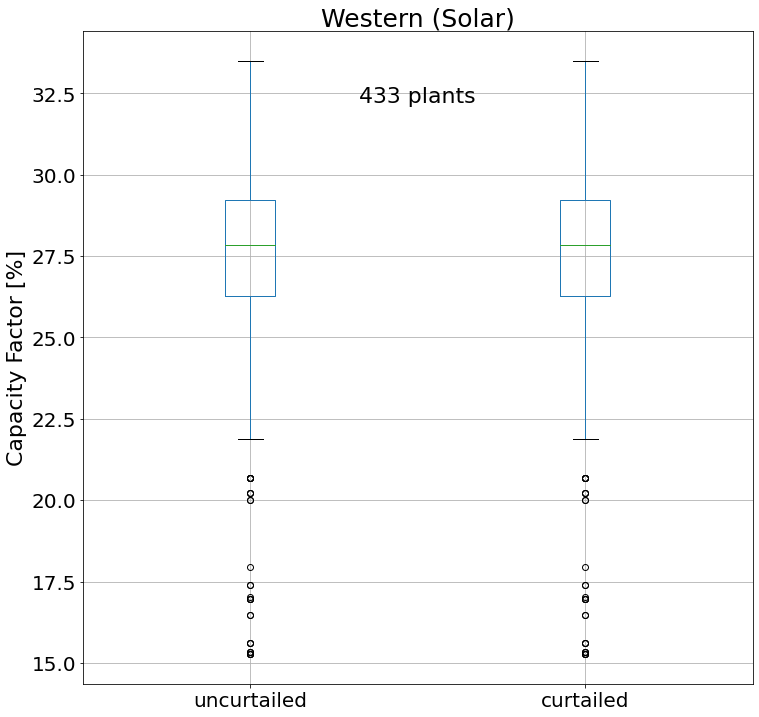

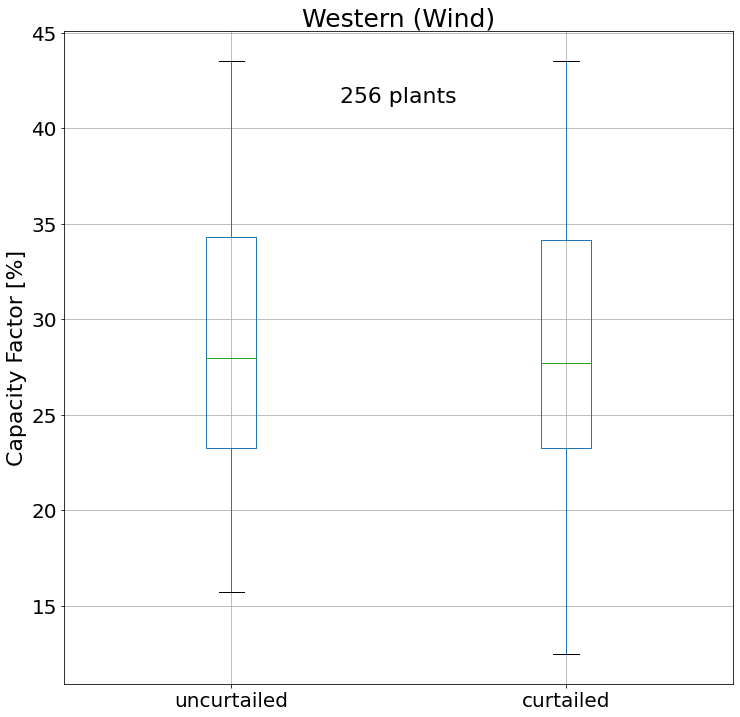

----------------------------------------
Capacity factor in Western: 
solar: 0.272 (pre-simulation) / 0.272 (post-simulation)
wind: 0.289 (pre-simulation) / 0.287 (post-simulation)
----------------------------------------


In [4]:
time = ("2016-01-01-00", "2016-12-31-23", "utc", "H")
zones = ["Western"]
do_yield_analysis(scenario, time, zones)